In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-detection-dataset/Deepression.csv


In [2]:
data=pd.read_csv('/kaggle/input/mental-health-detection-dataset/Deepression.csv')
data

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isnull()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
809,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
810,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
811,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [4]:
data.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [5]:
data.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [6]:
data.tail(274)

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
539,540,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Moderate
540,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(813, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [9]:
data.describe()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,407.000000,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,234.837178,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,610.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,813.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [10]:
data1=data.sort_values
data1

<bound method DataFrame.sort_values of      Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  \
0          1    1.0       1.0       1.0      5.0            5.0   
1          2    2.0       5.0       5.0      1.0            1.0   
2          3    5.0       2.0       2.0      2.0            2.0   
3          4    1.0       1.0       1.0      5.0            5.0   
4          5    2.0       5.0       5.0      1.0            1.0   
..       ...    ...       ...       ...      ...            ...   
808      809    NaN       NaN       NaN      NaN            NaN   
809      810    NaN       NaN       NaN      NaN            NaN   
810      811    NaN       NaN       NaN      NaN            NaN   
811      812    NaN       NaN       NaN      NaN            NaN   
812      813    NaN       NaN       NaN      NaN            NaN   

     Concentration  Agitation  Suicidal Ideation  Sleep Disturbance  \
0              1.0        5.0                5.0                1.0   
1             

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,813.0,407.000000,234.837178,1.0,204.0,407.0,610.0,813.0
Sleep,540.0,2.912963,1.738417,1.0,1.0,2.0,5.0,6.0
Appetite,540.0,2.777778,1.675610,1.0,1.0,2.0,5.0,5.0
Interest,540.0,2.785185,1.680998,1.0,1.0,2.0,5.0,5.0
Fatigue,540.0,2.964815,1.727402,1.0,1.0,2.0,5.0,6.0
Worthlessness,540.0,2.957407,1.740077,1.0,1.0,2.0,5.0,6.0
Concentration,540.0,2.777778,1.673394,1.0,1.0,2.0,5.0,5.0
Agitation,540.0,2.968519,1.719939,1.0,1.0,2.0,5.0,6.0
Suicidal Ideation,540.0,2.964815,1.733834,1.0,1.0,2.0,5.0,6.0
Sleep Disturbance,540.0,2.803704,1.655481,1.0,1.0,2.0,5.0,5.0


In [12]:
cols=data.columns
cols

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [13]:
data['Depression State'].unique


<bound method Series.unique of 0               Mild
1           Moderate
2             Severe
3      No depression
4           Moderate
           ...      
808              NaN
809              NaN
810              NaN
811              NaN
812              NaN
Name: Depression State, Length: 813, dtype: object>

<Axes: >

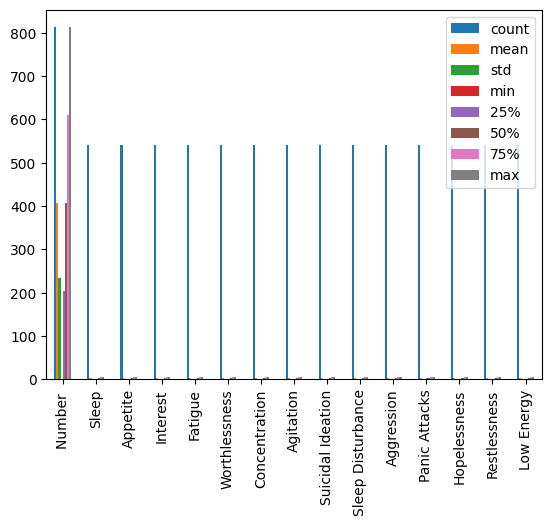

In [14]:
data.describe().T.plot(kind='bar')

Data visualization


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [16]:
x=data.iloc[:,0:12]
y=data['Depression State']

In [17]:
data2 = data[['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']]
data2.corr()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
Number,1.000000,-0.005079,-0.073859,-0.078715,-0.007211,-0.016602,-0.063596,-0.000218,-0.011847,-0.057016,-0.002732,0.007145,-0.002246,-0.012300,-0.023941
Sleep,-0.005079,1.000000,0.017551,0.017715,-0.195636,-0.193198,0.017574,-0.196377,-0.196141,0.006946,-0.202111,-0.208419,-0.194885,-0.196141,-0.182634
Appetite,-0.073859,0.017551,1.000000,0.994746,-0.414216,-0.419400,0.996031,-0.410577,-0.415234,0.995513,-0.406849,-0.396385,-0.412680,-0.415234,-0.306502
Interest,-0.078715,0.017715,0.994746,1.000000,-0.414076,-0.416679,0.985510,-0.413030,-0.412540,0.990178,-0.404210,-0.397665,-0.415110,-0.412540,-0.314272
Fatigue,-0.007211,-0.195636,-0.414216,-0.414076,1.000000,0.996332,-0.412197,0.993143,0.996290,-0.400767,0.996299,0.995116,0.995017,0.995051,0.869691
Worthlessness,-0.016602,-0.193198,-0.419400,-0.416679,0.996332,1.000000,-0.419955,0.993269,0.997556,-0.406082,0.996425,0.991580,0.993869,0.997556,0.868107
Concentration,-0.063596,0.017574,0.996031,0.985510,-0.412197,-0.419955,1.000000,-0.405964,-0.415784,0.991473,-0.407388,-0.394313,-0.408079,-0.415784,-0.296638
Agitation,-0.000218,-0.196377,-0.410577,-0.413030,0.993143,0.993269,-0.405964,1.000000,0.991947,-0.397038,0.993127,0.995661,0.996874,0.995680,0.872934
Suicidal Ideation,-0.011847,-0.196141,-0.415234,-0.412540,0.996290,0.997556,-0.415784,0.991947,1.000000,-0.401866,0.993847,0.991424,0.993809,0.996297,0.866464
Sleep Disturbance,-0.057016,0.006946,0.995513,0.990178,-0.400767,-0.406082,0.991473,-0.397038,-0.401866,1.000000,-0.393379,-0.382716,-0.399166,-0.401866,-0.293967


***Removed all null values***

In [18]:
df=data.dropna()
df.isnull().sum()

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

***Heatmap plot***

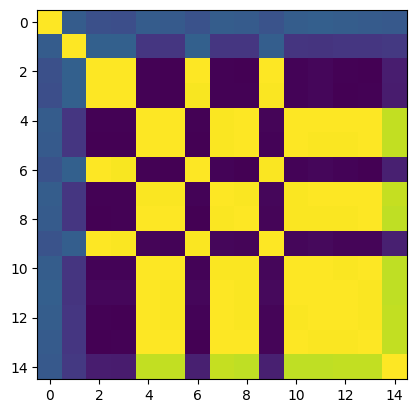

In [19]:
plt.imshow(data2.corr())

***Converting categorical data to numerical***

In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_data = ["Mild", "Moderate", "Severe", "No depression"]
label_encoder = LabelEncoder()
numerical_data = label_encoder.fit_transform(categorical_data)
print(dict(zip(categorical_data, numerical_data)))

{'Mild': 0, 'Moderate': 1, 'Severe': 3, 'No depression': 2}


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
data.dtypes.sample(14)

Sleep Disturbance    float64
Interest             float64
Panic Attacks        float64
Number                 int64
Restlessness         float64
Depression State      object
Agitation            float64
Worthlessness        float64
Fatigue              float64
Concentration        float64
Appetite             float64
Sleep                float64
Hopelessness         float64
Aggression           float64
dtype: object

In [23]:
one_hot_encoded_data = pd.get_dummies(df)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X=df.drop('Depression State',axis=1)
Y=df['Depression State']

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


In [27]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Test set shape:", X_test.shape, Y_test.shape)

Training set shape: (432, 15) (432,)
Test set shape: (108, 15) (108,)
